In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as MSE

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
import statsmodels.api as sm

### Carregando os dados

In [4]:
dados = pd.read_csv('MSFT.csv', delimiter=';')

In [5]:
dados.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
0,04/01/2010,30.62,31.10,30.59,30.95,38409100,28.09
1,05/01/2010,30.85,31.10,30.64,30.96,49749600,28.10
2,06/01/2010,30.88,31.08,30.52,30.77,58182400,27.93
3,07/01/2010,30.63,30.70,30.19,30.45,50559700,27.64
4,08/01/2010,30.28,30.88,30.24,30.66,51197400,27.83


In [6]:
serie = dados['Adj_Close']

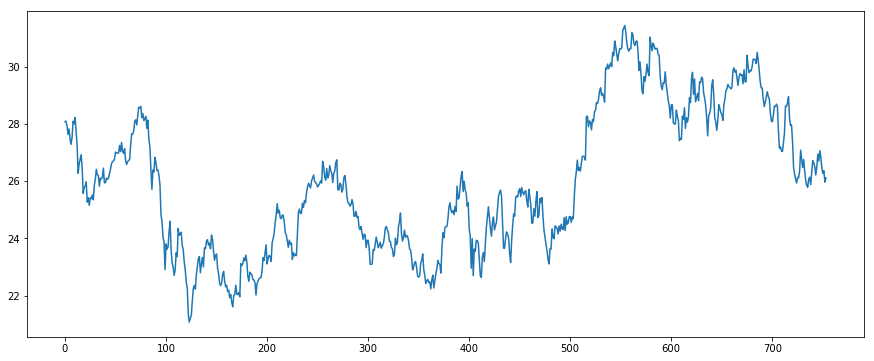

In [7]:
plt.plot(serie)
plt.show()

### Identificação

In [8]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

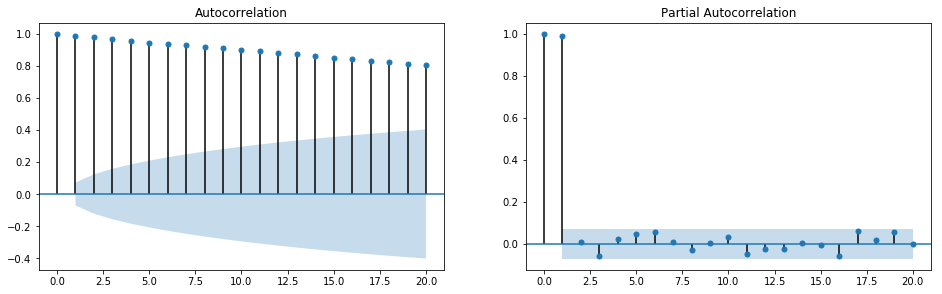

In [9]:
qtd_lag = 20
acf_pacf(serie, qtd_lag)

In [10]:
tam_treinamento = int(len(serie) * 0.75)
dados_treinamento, dados_teste = serie.iloc[0:tam_treinamento].values, serie.iloc[tam_treinamento:].values

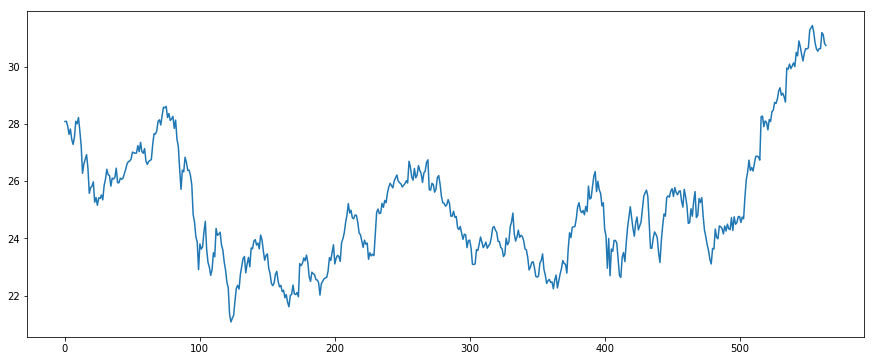

In [11]:
plt.plot(dados_treinamento)
plt.show()

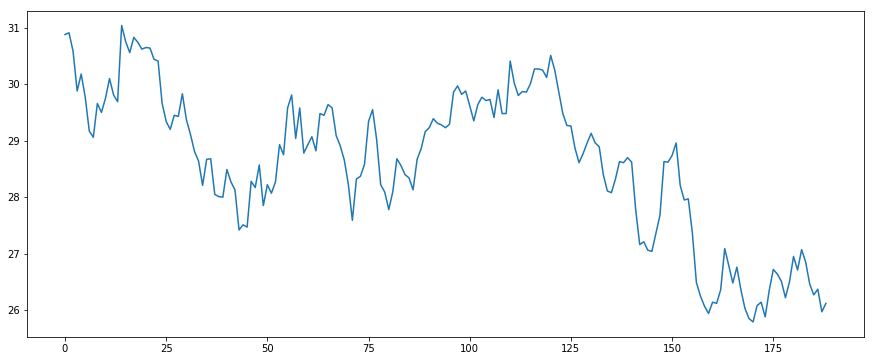

In [12]:
plt.plot(dados_teste)
plt.show()

In [15]:
p = 1
d = 2
q = 1

### Estimação

In [16]:
modelo = ARIMA(dados_treinamento, order=(p,d,q)).fit()

In [17]:
train_prev = modelo.fittedvalues

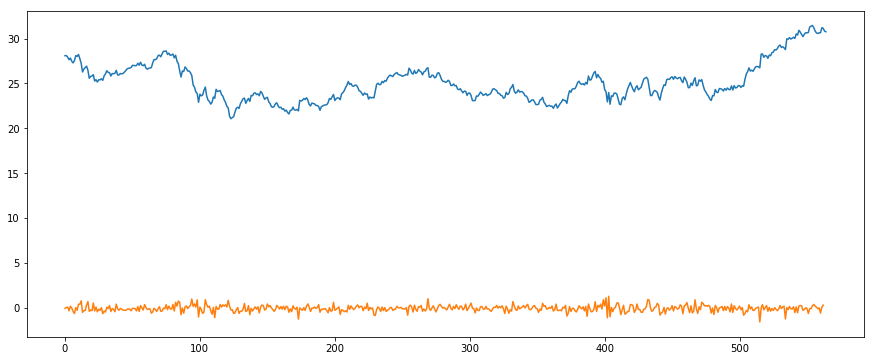

In [18]:
plt.plot(dados_treinamento)
plt.plot(train_prev)
plt.show()

### Avaliação 

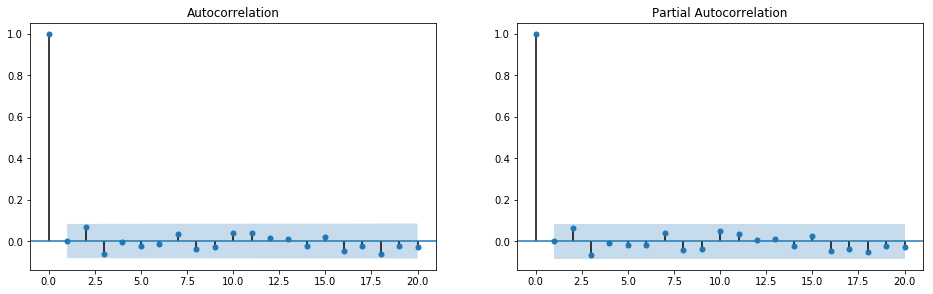

In [19]:
acf_pacf(modelo.resid, qtd_lag)

### Previsão 

In [20]:
historico = [x for x in dados_treinamento]
previsoes = []
for i in range(len(dados_teste)):
    modelo = ARIMA(historico, order=(p,d,q)).fit()
    prev = modelo.forecast()[0]
    previsoes.append(prev)
    obs = dados_teste[i]
    historico.append(obs)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
len(dados_teste)

189

In [22]:
len(previsoes)

189

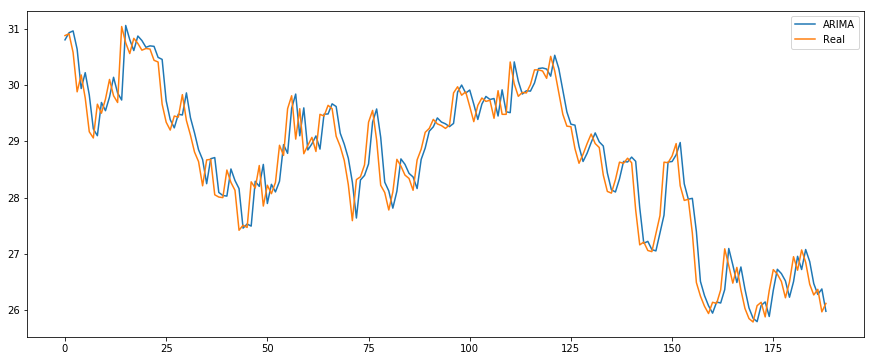

In [23]:
plt.plot(previsoes, label = 'ARIMA')
plt.plot(dados_teste, label='Real')
plt.legend(loc='best')
plt.show()

In [21]:
MSE(dados_teste, previsoes)

0.14356522976336872